# Problem statement: Designing a artificial neural network that will recognize handwritten digits

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

# Loading MNIST Dataset

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# lets have a look at the dataset

In [ ]:
# lets print the shape of xtrain before normalizing
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


In [ ]:
# building the input vector from 28*28 pixels
X_train =x_train.reshape(60000,784)
X_test =x_test.reshape(10000,784)
print("X_train",X_train.shape)
print("X_test",X_test.shape)


X_train (60000, 784)
X_test (10000, 784)


In [ ]:
# normalizing the images
X_train=X_train/255.0    # normalizing each pixel of the image in range of 0-to 1
X_test=X_test/255.0      # normalizing each pixel of the image in range of 0-to 1
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#  one hot Encoding of labels

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
n_classes=10
print("The shape of y_train before one hot encoding" , y_train.shape)
print("The shape of y_test before one hot encoding" , y_test.shape)

print("-----------------------------------------------------------------")
Y_train=to_categorical(y_train,n_classes)
Y_test=to_categorical(y_test,n_classes)

print("The shape of Y_train after one hot encoding" , Y_train.shape)
print("The shape of Y_test after one hot encoding" , Y_test.shape)

The shape of y_train before one hot encoding (60000,)
The shape of y_test before one hot encoding (10000,)
-----------------------------------------------------------------
The shape of Y_train after one hot encoding (60000, 10)
The shape of Y_test after one hot encoding (10000, 10)


In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Building the Artificial Neural Network

In [ ]:
ANN=Sequential()

# 1st Layer
ANN.add(Dense(512,activation="relu",input_shape=(784,)))       # 512 is neuron and its value depend on you

# 2nd Layer
ANN.add(Dense(128,activation="relu"))

# output Layer
ANN.add(Dense(10,activation="softmax"))

In [ ]:
ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model=Sequential()
# first hidden layer
model.add(Dense(512,input_shape=(784,)))    # 512 is neuron and its value depend on you
model.add(Activation('relu'))
# 2nd hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
# the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

# Variation

In [ ]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compliation

# Optimizer use for Upadte the Weights

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])  # loss is 'categorical_crossentropy' because output is categorical

# Model training and validation

In [ ]:
history=model.fit(X_train,Y_train,batch_size=64,epochs=20,verbose=2,validation_data=(X_test,Y_test))  # epoch is 20 means 20 time data is given

Epoch 1/20
938/938 - 8s - 8ms/step - accuracy: 0.8000 - loss: 0.8120 - val_accuracy: 0.8977 - val_loss: 0.3790
Epoch 2/20
938/938 - 9s - 9ms/step - accuracy: 0.9048 - loss: 0.3413 - val_accuracy: 0.9181 - val_loss: 0.2910
Epoch 3/20
938/938 - 6s - 7ms/step - accuracy: 0.9200 - loss: 0.2816 - val_accuracy: 0.9294 - val_loss: 0.2546
Epoch 4/20
938/938 - 11s - 12ms/step - accuracy: 0.9304 - loss: 0.2471 - val_accuracy: 0.9339 - val_loss: 0.2272
Epoch 5/20
938/938 - 6s - 6ms/step - accuracy: 0.9377 - loss: 0.2223 - val_accuracy: 0.9389 - val_loss: 0.2082
Epoch 6/20
938/938 - 7s - 8ms/step - accuracy: 0.9429 - loss: 0.2024 - val_accuracy: 0.9435 - val_loss: 0.1905
Epoch 7/20
938/938 - 6s - 6ms/step - accuracy: 0.9475 - loss: 0.1859 - val_accuracy: 0.9465 - val_loss: 0.1797
Epoch 8/20
938/938 - 7s - 8ms/step - accuracy: 0.9510 - loss: 0.1719 - val_accuracy: 0.9527 - val_loss: 0.1668
Epoch 9/20
938/938 - 13s - 14ms/step - accuracy: 0.9549 - loss: 0.1595 - val_accuracy: 0.9539 - val_loss: 0.15

# Plotting the accuracy and losses during training and validation

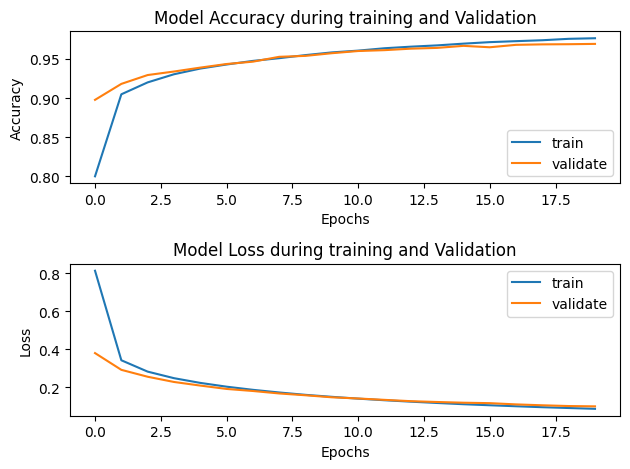

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy during training and Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','validate'])

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss during training and Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','validate'])

plt.tight_layout()

training accuracy is high that means bias is low and variance is high so model is overfit.

aftter rerun codes graphs is change model is goodfit

if train and validate have gap it means model is not goodfit

if train and validate have not gap it means model is goodfit

# Evaluate the model

In [ ]:
loss_and_metrics= model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss",loss_and_metrics[0])
print("Test accuracy",loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.9692 - loss: 0.0990
Test Loss 0.09895722568035126
Test accuracy 0.9692000150680542


In [ ]:
loss,acc=model.evaluate(X_test,Y_test,verbose=0)
print("Test Accuracy is ",acc)
print("Test loss is ",loss)

Test Accuracy is  0.9692000150680542
Test loss is  0.09895722568035126


# perfomance matrix

In [ ]:
# predicted_classes=model.predict_classes(X_test)
predicted_classes=np.argmax(model.predict(X_test),axis=1)
print(predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
# see which we predicted correctly and which not
correct_indices= np.nonzero(predicted_classes==y_test)[0]
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0]
print()
print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")


9692 classified correctly
308 classified incorrectly


# Visualize the pretiction

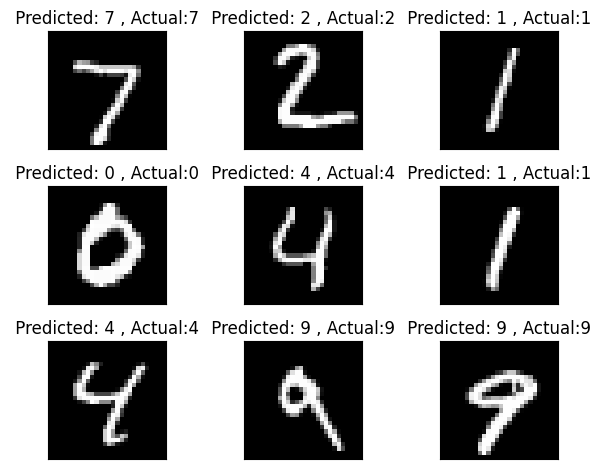

In [ ]:
#  Checking Correctly predicted
fig=plt.figure()

for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
  plt.title(" Predicted: {} , Actual:{} ".format(predicted_classes[correct],y_test[correct]))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

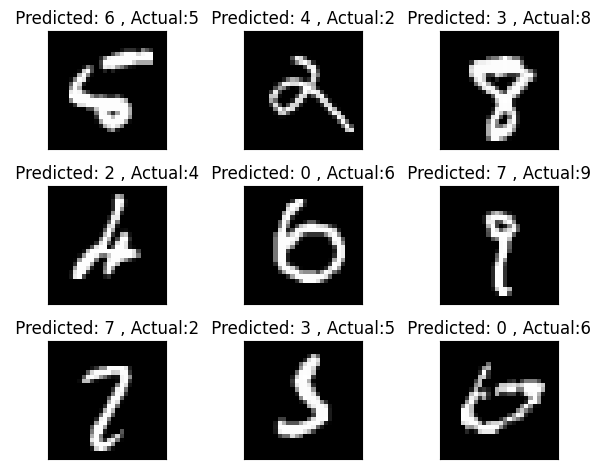

In [ ]:
#  Checking Inorrectly predicted
fig=plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray')
  plt.title(" Predicted: {} , Actual:{} ".format(predicted_classes[incorrect],y_test[incorrect]))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()